<a href="https://colab.research.google.com/github/chieuanh2910/chill/blob/main/MIS779_A2_Clara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
from functools import reduce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/MIS779/Customer.xlsx')
df1.to_csv('Customer.csv', index=None, header = True)

df2 = pd.read_excel('/content/drive/MyDrive/MIS779/Product1_Mod.xlsx')
df2.to_csv('Product1.csv', index=None, header = True)

df3 = pd.read_excel('/content/drive/MyDrive/MIS779/Product2_Mod.xlsx')
df3.to_csv('Product2.csv', index=None, header = True)

df4 = pd.read_excel('/content/drive/MyDrive/MIS779/Product3_Mod.xlsx')
df4.to_csv('Product3.csv', index=None, header = True)

**CONVERT TO CSV**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1 = pd.read_csv('Customer.csv')
df2 = pd.read_csv('Product1.csv')
df3 = pd.read_csv('Product2.csv')
df4 = pd.read_csv('Product3.csv')

product= [df2, df3, df4]
df_product = pd.concat(product)
dataframe = [df1, df_product]

df= reduce(lambda  left,right: pd.merge(left,right,on=['CostID','Affluence_Level'],
                                              how='inner'), dataframe)
df['IsInitialCommitment'] = df['IsInitialCommitment'].astype(bool)
df['FulfilmentDate'] = pd.to_datetime(df['FulfilmentDate'])
df['FulfilmentEndedDate'] = pd.to_datetime(df['FulfilmentEndedDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333098 entries, 0 to 333097
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   CostID                                      333098 non-null  object        
 1   Affluence_Level                             323314 non-null  object        
 2   Tenure                                      333098 non-null  int64         
 3   Age                                         333098 non-null  int64         
 4   Gender                                      260988 non-null  object        
 5   State                                       330923 non-null  object        
 6   HasValidEmailAddress                        333098 non-null  bool          
 7   HasValidMobileNumber                        333098 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   333098 non-null  int64        

In [ ]:
df.isnull().sum()

CostID                                            0
Affluence_Level                                9784
Tenure                                            0
Age                                               0
Gender                                        72110
State                                          2175
HasValidEmailAddress                              0
HasValidMobileNumber                              0
Number_Of_Inbound_Communication_In_24_MTH         0
Number_Of_Inbound_Communication_In_60_MTH         0
Number_Of_Outbound_Communication_In_24_MTH        0
Number_Of_Outbound_Communication_In_60_MTH        0
Pathway_Arrears_In_24_MTH                         0
Pathway_Arrears_In_60_MTH                         0
Inter_Mailing_Preferances_Update                  0
Inter_Personal_Details_Update                     0
contract_ID                                    7199
IsInitialCommitment                               0
Product                                        7199
TotPaidR    

In [ ]:
df['Gender'].fillna('Others', inplace= True)

df.dropna(subset = ['Product','contract_ID','State','Affluence_Level'], inplace=True)

In [ ]:
df.isnull().sum()

CostID                                            0
Affluence_Level                                   0
Tenure                                            0
Age                                               0
Gender                                            0
State                                             0
HasValidEmailAddress                              0
HasValidMobileNumber                              0
Number_Of_Inbound_Communication_In_24_MTH         0
Number_Of_Inbound_Communication_In_60_MTH         0
Number_Of_Outbound_Communication_In_24_MTH        0
Number_Of_Outbound_Communication_In_60_MTH        0
Pathway_Arrears_In_24_MTH                         0
Pathway_Arrears_In_60_MTH                         0
Inter_Mailing_Preferances_Update                  0
Inter_Personal_Details_Update                     0
contract_ID                                       0
IsInitialCommitment                               0
Product                                           0
TotPaidR    

In [ ]:
df['Is_Member'] = df['Product'].apply(lambda x: 1 if 'Membership' in x else 0)


In [ ]:
print("Percentage of missing values in Fulfilment Ended Date: ", round((df['FulfilmentEndedDate'].isnull().sum())/(len(df['FulfilmentEndedDate']))*100,2))


Percentage of missing values in Fulfilment Ended Date:  4.05


In [ ]:
df['FulfilmentEndedDate'] = df['FulfilmentEndedDate'].fillna('2023-07-27') #Replace missing values with 27/07/2023 to calculate membership duration


In [ ]:
df.isnull().sum()

CostID                                        0
Affluence_Level                               0
Tenure                                        0
Age                                           0
Gender                                        0
State                                         0
HasValidEmailAddress                          0
HasValidMobileNumber                          0
Number_Of_Inbound_Communication_In_24_MTH     0
Number_Of_Inbound_Communication_In_60_MTH     0
Number_Of_Outbound_Communication_In_24_MTH    0
Number_Of_Outbound_Communication_In_60_MTH    0
Pathway_Arrears_In_24_MTH                     0
Pathway_Arrears_In_60_MTH                     0
Inter_Mailing_Preferances_Update              0
Inter_Personal_Details_Update                 0
contract_ID                                   0
IsInitialCommitment                           0
Product                                       0
TotPaidR                                      0
FulfilmentDate                          

In [ ]:
#Define function to calculate membership duration (months)
def calculate_Membership_Duration(row):
    if row['Product'] == 'Membership':
        duration_in_days = (row['FulfilmentEndedDate'] - row['FulfilmentDate']).total_seconds() / (60 * 60 * 24)
        return round(duration_in_days / 30.44, 2)
    else:
        return 0

df['MembershipDuration'] = df.apply(calculate_Membership_Duration, axis=1)

df['MembershipDuration'] = pd.to_numeric(df['MembershipDuration'], errors='coerce') #change output to numerical datatype

In [ ]:
#Changing fulfilment ended date to fulfilment date for non members where dates are not equal.
#fulfilment ended date ko replace kr diya fulfilment date se
df.loc[(df['FulfilmentDate'] != df['FulfilmentEndedDate']) & (df['Product'] != 'Membership'),'FulfilmentEndedDate'] = df['FulfilmentDate']

In [ ]:
(df['MembershipDuration'] < 0).sum() #How many negative value

81

In [ ]:
df = df[df['MembershipDuration'] >= 0] # Remove 81 negative values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314626 entries, 0 to 333097
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   CostID                                      314626 non-null  object        
 1   Affluence_Level                             314626 non-null  object        
 2   Tenure                                      314626 non-null  int64         
 3   Age                                         314626 non-null  int64         
 4   Gender                                      314626 non-null  object        
 5   State                                       314626 non-null  object        
 6   HasValidEmailAddress                        314626 non-null  bool          
 7   HasValidMobileNumber                        314626 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   314626 non-null  int64        

In [ ]:
#Define function to calculate membership revenue = duration * $77
def calculate_Membership_Revenue(row):
    if row['Product'] == 'Membership':
        revenue = row['MembershipDuration'] * 77
        return revenue
    else:
        return 0

df['MembershipRevenue'] = df.apply(calculate_Membership_Revenue, axis=1) #Create a new column to the df


In [ ]:
df.describe()

,Tenure,Age,Number_Of_Inbound_Communication_In_24_MTH,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_24_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_24_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,TotPaidR,Is_Member,MembershipDuration,MembershipRevenue
count,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.00000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000,314626.000000
mean,18.109079,52.307359,11.417435,28.173762,63.814599,164.640561,0.218018,0.48769,0.112152,0.801971,47.441193,0.040283,1.326730,102.158187
std,9.774057,21.574779,8.624959,19.118916,28.843109,67.754568,0.728072,1.48464,0.354570,1.192074,172.670660,0.196622,7.140669,549.831548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,11.000000,44.000000,7.000000,19.000000,39.000000,112.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
50%,16.000000,56.000000,11.000000,26.000000,70.000000,177.000000,0.000000,0.00000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
75%,24.000000,66.000000,15.000000,33.000000,85.000000,215.000000,0.000000,0.00000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000
max,49.000000,105.000000,149.000000,442.000000,166.000000,359.000000,22.000000,56.00000,6.000000,14.000000,7000.000000,1.000000,78.420000,6038.340000


**Create Revenue attribute**

In [ ]:
df['Revenue'] = df.apply(lambda row: row['MembershipRevenue'] if row['Product'] == 'Membership' else row['TotPaidR'], axis=1)

**Age transformation**

Text(0, 0.5, 'Count')

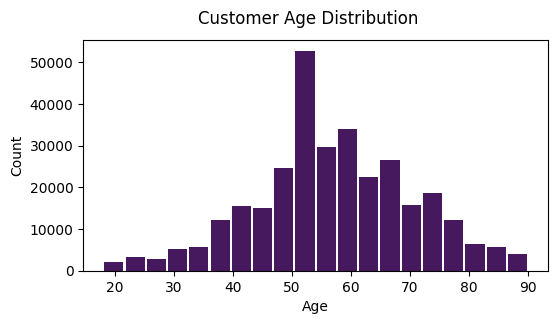

In [ ]:
average_value_age = df['Age'].mean()
df.loc[df['Age'] < 18, 'Age'] = average_value_age
df.loc[df['Age'] > 90, 'Age'] = average_value_age
plt.figure(figsize=(6, 3))
plt.hist(df['Age'], bins=20, rwidth=0.9, color ='#46185e')
plt.suptitle('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
# Group by 'CostID' and create a unique list of products for each customer
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Calculate the number of unique products used by each customer
customer_products['NumProducts'] = customer_products['Product'].apply(len)

# Rename the columns for clarity
customer_products.rename(columns={'Product': 'ProductBasket'}, inplace=True)


In [ ]:
df = df.merge(customer_products, on='CostID', how='inner')


In [ ]:
df = df.drop_duplicates(subset='CostID', keep='first')


In [ ]:
df.shape

(31408, 28)

**DESCRIPTIVE STATISTICS**

In [ ]:
#Create a new df only for Membership
df_membership = df.loc[df['Product'] == 'Membership']
#Statistics
sum_revenue = df_membership['MembershipRevenue'].sum()
min_revenue = df_membership['MembershipRevenue'].min()
max_revenue = df_membership['MembershipRevenue'].max()
mean_revenue = df_membership['MembershipRevenue'].mean()

print("Sum of Revenue:", sum_revenue)
print("Minimum Revenue:", min_revenue)
print("Maximum Revenue:", max_revenue)
print("Mean Revenue:", mean_revenue)

Sum of Revenue: 13016361.05
Minimum Revenue: 0.0
Maximum Revenue: 5959.8
Mean Revenue: 2462.8876158940398


In [ ]:
min_duration = df_membership['MembershipDuration'].min()
max_duration = df_membership['MembershipDuration'].max()
print("Minimum Duration:", min_duration)
print("Maximum Duration:", max_duration)

Minimum Duration: 0.0
Maximum Duration: 78.42


In [ ]:
df_filtered = df[df['Product'].isin(['Advert', 'Customized','Article', 'Detailed'])]

# Calculate the occurrence of products 'A' and 'B' and their respective sales counts
product_occurrence = df['Product'].value_counts()
sales_counts = df_filtered.groupby('Product')['TotPaidR'].sum()

print("Product Occurrence:")
print(product_occurrence)

print("\ Revenue:")
print(sales_counts)

Product Occurrence:
Detailed      157030
Customized     90994
Article        37139
Advert         16789
Membership     12674
Name: Product, dtype: int64
\ Revenue:
Product
Advert        9212910.78
Article       1595268.00
Customized    1728886.00
Detailed      1413270.00
Name: TotPaidR, dtype: float64


Text(0, 0.5, 'Count')

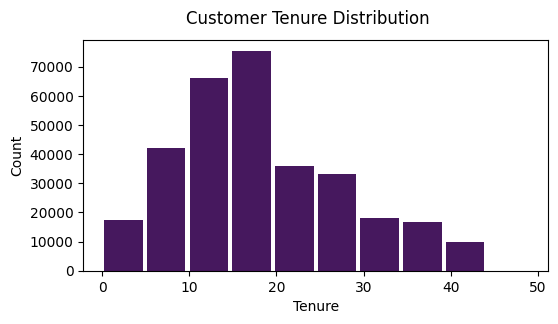

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(6, 3))
pyplot.hist(df['Tenure'], bins=10, rwidth=0.9, color ='#46185e')
pyplot.suptitle('Customer Tenure Distribution')
pyplot.xlabel('Tenure')
pyplot.ylabel('Count')

**ACTIVE MEMBERSHIP**

In [ ]:
df_membership['IsActiveMembership'] = df_membership['FulfilmentEndedDate'] == '2023-07-27'
df_membership['IsActiveMembership'].value_counts()

<ipython-input-22-8bae26deb754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_membership['IsActiveMembership'] = df_membership['FulfilmentEndedDate'] == '2023-07-27'


True     9301
False    3373
Name: IsActiveMembership, dtype: int64

<ipython-input-23-96e5192348bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_membership['Customer Tenure Group'] = pd.cut(df_membership['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
<ipython-input-23-96e5192348bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_membership['Membership Status'] = df_membership['IsActiveMembership'].map({True: 'Active', False: 'Inactive'})


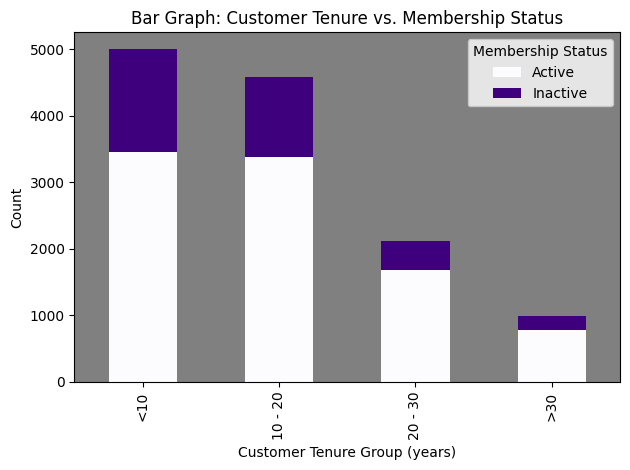

In [ ]:
# Divide 'Customer Tenure' into four groups: <10, 10 - 20, 20 - 30, and >30
tenure_bins = [0, 10, 20, 30, float('inf')]
tenure_labels = ['<10', '10 - 20', '20 - 30', '>30']
df_membership['Customer Tenure Group'] = pd.cut(df_membership['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Map IsActiveMembership to 'Active' and 'Inactive'
df_membership['Membership Status'] = df_membership['IsActiveMembership'].map({True: 'Active', False: 'Inactive'})

# Calculate the count of 'Ad_package' (One-month, Three-month, Customized) for each 'Customer Tenure Group' and 'Membership Status'
grouped_counts = df_membership.groupby(['Customer Tenure Group', 'Membership Status']).size().unstack(fill_value=0)

# Create the bar graph with purple colormap
ax = grouped_counts.plot(kind='bar', stacked=True, colormap='Purples')

# Add labels and title
plt.xlabel('Customer Tenure Group (years)')
plt.ylabel('Count')
plt.title('Bar Graph: Customer Tenure vs. Membership Status')

# Set facecolor and layout
ax.set_facecolor('grey')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import plotly.express as px

# Separate data for active and inactive memberships
active_data = df_membership[df_membership['IsActiveMembership'] == True]
inactive_data = df_membership[df_membership['IsActiveMembership'] == False]

# Create histograms for MembershipDuration using Plotly Express
fig = px.histogram(df_membership, x='MembershipDuration', color='IsActiveMembership', nbins=20,
                   labels={'MembershipDuration': 'Membership Duration'},
                   category_orders={'IsActiveMembership': ['Active', 'Inactive']},
                   title='Histogram of Membership Duration by Membership Status')
fig.update_layout(
    autosize=False,
    width=800,  # Adjust width as needed
    height=600  # Adjust height as needed
)
fig.update_layout(barmode='overlay')  # Overlay bars to compare distributions

# Show the plot
fig.show()

In [ ]:
quartiles = np.percentile(df_membership['MembershipDuration'], [25, 50, 75])

# Display quartiles
print("1st Quartile (25th percentile):", quartiles[0])
print("2nd Quartile (Median, 50th percentile):", quartiles[1])
print("3rd Quartile (75th percentile):", quartiles[2])

1st Quartile (25th percentile): 22.54
2nd Quartile (Median, 50th percentile): 35.35
3rd Quartile (75th percentile): 40.77


<ipython-input-26-9c53ffe7e1e1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-9c53ffe7e1e1>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



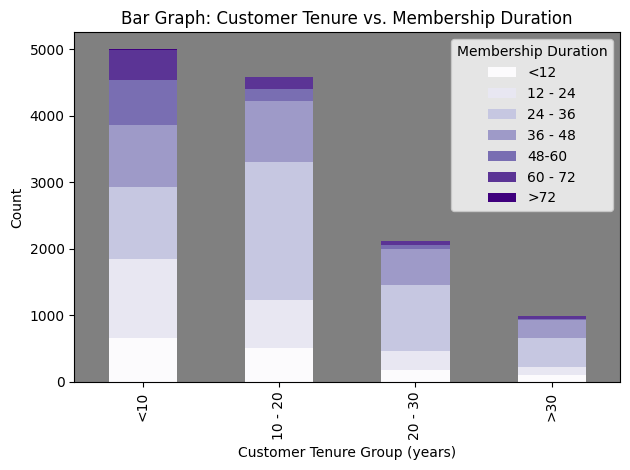

In [ ]:
tenure_bins = [0, 10, 20, 30, float('inf')]
tenure_labels = ['<10', '10 - 20', '20 - 30', '>30']
df_membership['Customer Tenure Group'] = pd.cut(df_membership['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

duration_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
duration_labels = ['<12', '12 - 24', '24 - 36', '36 - 48', '48-60', '60 - 72', '>72']
df_membership['Membership Duration Group'] = pd.cut(df_membership['MembershipDuration'], bins=duration_bins, labels=duration_labels, right=False)

# # Calculate the count of 'Ad_package' (One-month, Three-month, Customized) for each 'Customer Tenure Group'
grouped_counts = df_membership.groupby(['Customer Tenure Group', 'Membership Duration Group']).size().unstack(fill_value=0)


# Create the bar graph with purple colormap
ax = grouped_counts.plot(kind='bar',stacked = True, colormap='Purples')

# Add labels and title
plt.xlabel('Customer Tenure Group (years)')
plt.ylabel('Count')
plt.title('Bar Graph: Customer Tenure vs. Membership Duration')

# Show the plot
ax.set_facecolor('grey')
plt.legend(title='Membership Duration', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Define custom colors
colors = ['#00CC96','#AB63FA']

# Group and aggregate data
grouped_data = df_membership.groupby(['Customer Tenure Group', 'IsActiveMembership'])['Revenue'].sum().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(grouped_data, x='Customer Tenure Group', y='Revenue', color='IsActiveMembership',
             labels={'Customer Tenure Group': 'Customer Tenure', 'Revenue': 'Total Revenue'},
             category_orders={'Customer Tenure Group': ['<1 Year', '1-3 Years', '3-5 Years', '>5 Years'], 'IsActiveMembership': [True, False]},
             title='Total Revenue of Active and Inactive Memberships by Customer Tenure',
             color_discrete_sequence=colors)  # Apply custom colors

# Resize the figure
fig.update_layout(
    autosize=False,
    width=800,  # Adjust width as needed
    height=700  # Adjust height as needed
)

# Set barmode to 'group' to prevent stacking
fig.update_layout(barmode='group')

# Create a table chart using go.Figure and add_trace
table_data = grouped_data.pivot(index='Customer Tenure Group', columns='IsActiveMembership', values='Revenue').reset_index()
fig.add_trace(go.Table(
    header=dict(values=['Customer Tenure Group', 'Active', 'Inactive']),
    cells=dict(values=[table_data['Customer Tenure Group'], table_data[True], table_data[False]])
))

# Show the plot
fig.show()

In [ ]:
print("Min Membership Duration: ", df_membership['MembershipDuration'].min())
print("Max Membership Duration: ", df_membership['MembershipDuration'].max())

Min Membership Duration:  0.0
Max Membership Duration:  78.42


<ipython-input-29-a2b69ad02c39>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



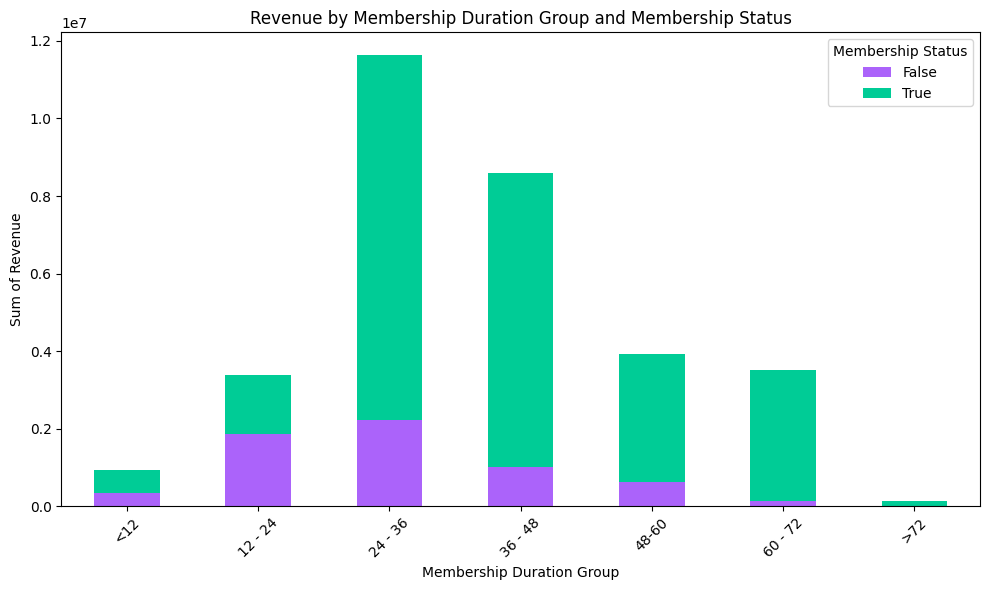

In [ ]:
duration_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
duration_labels = ['<12', '12 - 24', '24 - 36', '36 - 48', '48-60', '60 - 72', '>72']
df_membership['Membership Duration Group'] = pd.cut(df_membership['MembershipDuration'], bins=duration_bins, labels=duration_labels, right=False)


# Group by 'Membership Duration Group' and 'IsActiveMembership', and sum the revenue
revenue_by_duration_status = df_membership.groupby(['Membership Duration Group', 'IsActiveMembership'])['Revenue'].sum().reset_index()

# Pivot the data to create a table suitable for plotting
pivot_table = revenue_by_duration_status.pivot(index='Membership Duration Group', columns='IsActiveMembership', values='Revenue')
pivot_table = pivot_table.reindex(duration_labels)  # Reorder rows based on duration labels

# Define colors for Membership Status
colors = ['#AB63FA', '#00CC96']

# Create a stacked bar chart with custom colors
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Sum of Revenue')
ax.set_xlabel('Membership Duration Group')
ax.set_title('Revenue by Membership Duration Group and Membership Status')
plt.xticks(rotation=45)
plt.legend(title='Membership Status')

plt.tight_layout()
plt.show()

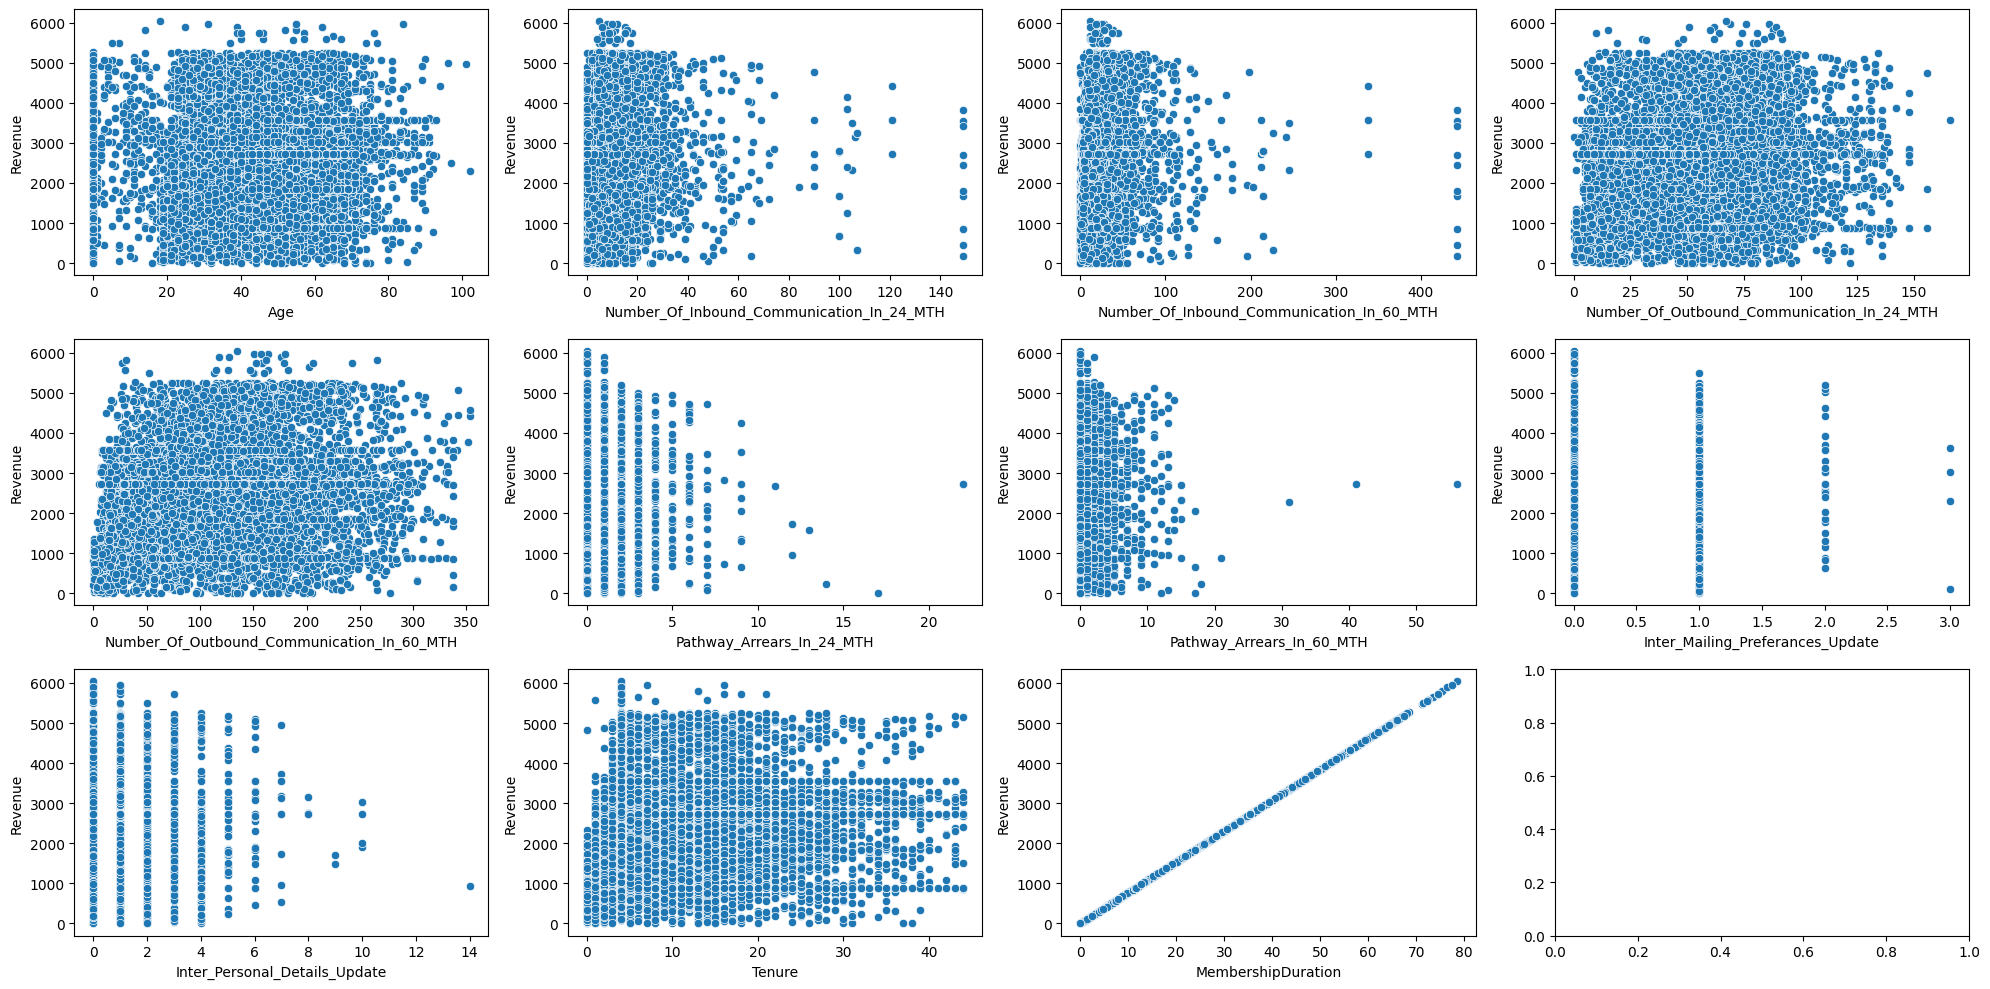

In [ ]:
#Visualize the relationship between Revenue to other numberical attributes
selected_variables = df_membership[['Age','Number_Of_Inbound_Communication_In_24_MTH','Number_Of_Inbound_Communication_In_60_MTH',
                                  'Number_Of_Outbound_Communication_In_24_MTH','Number_Of_Outbound_Communication_In_60_MTH','Pathway_Arrears_In_24_MTH',
                                  'Pathway_Arrears_In_60_MTH','Inter_Mailing_Preferances_Update','Inter_Personal_Details_Update',
                                  'Tenure', "MembershipDuration"]]
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for i, var in enumerate(selected_variables):
    row = i // 4
    col = i % 4
    sns.scatterplot(data=df_membership, x=var, y='Revenue', ax=axes[row, col])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


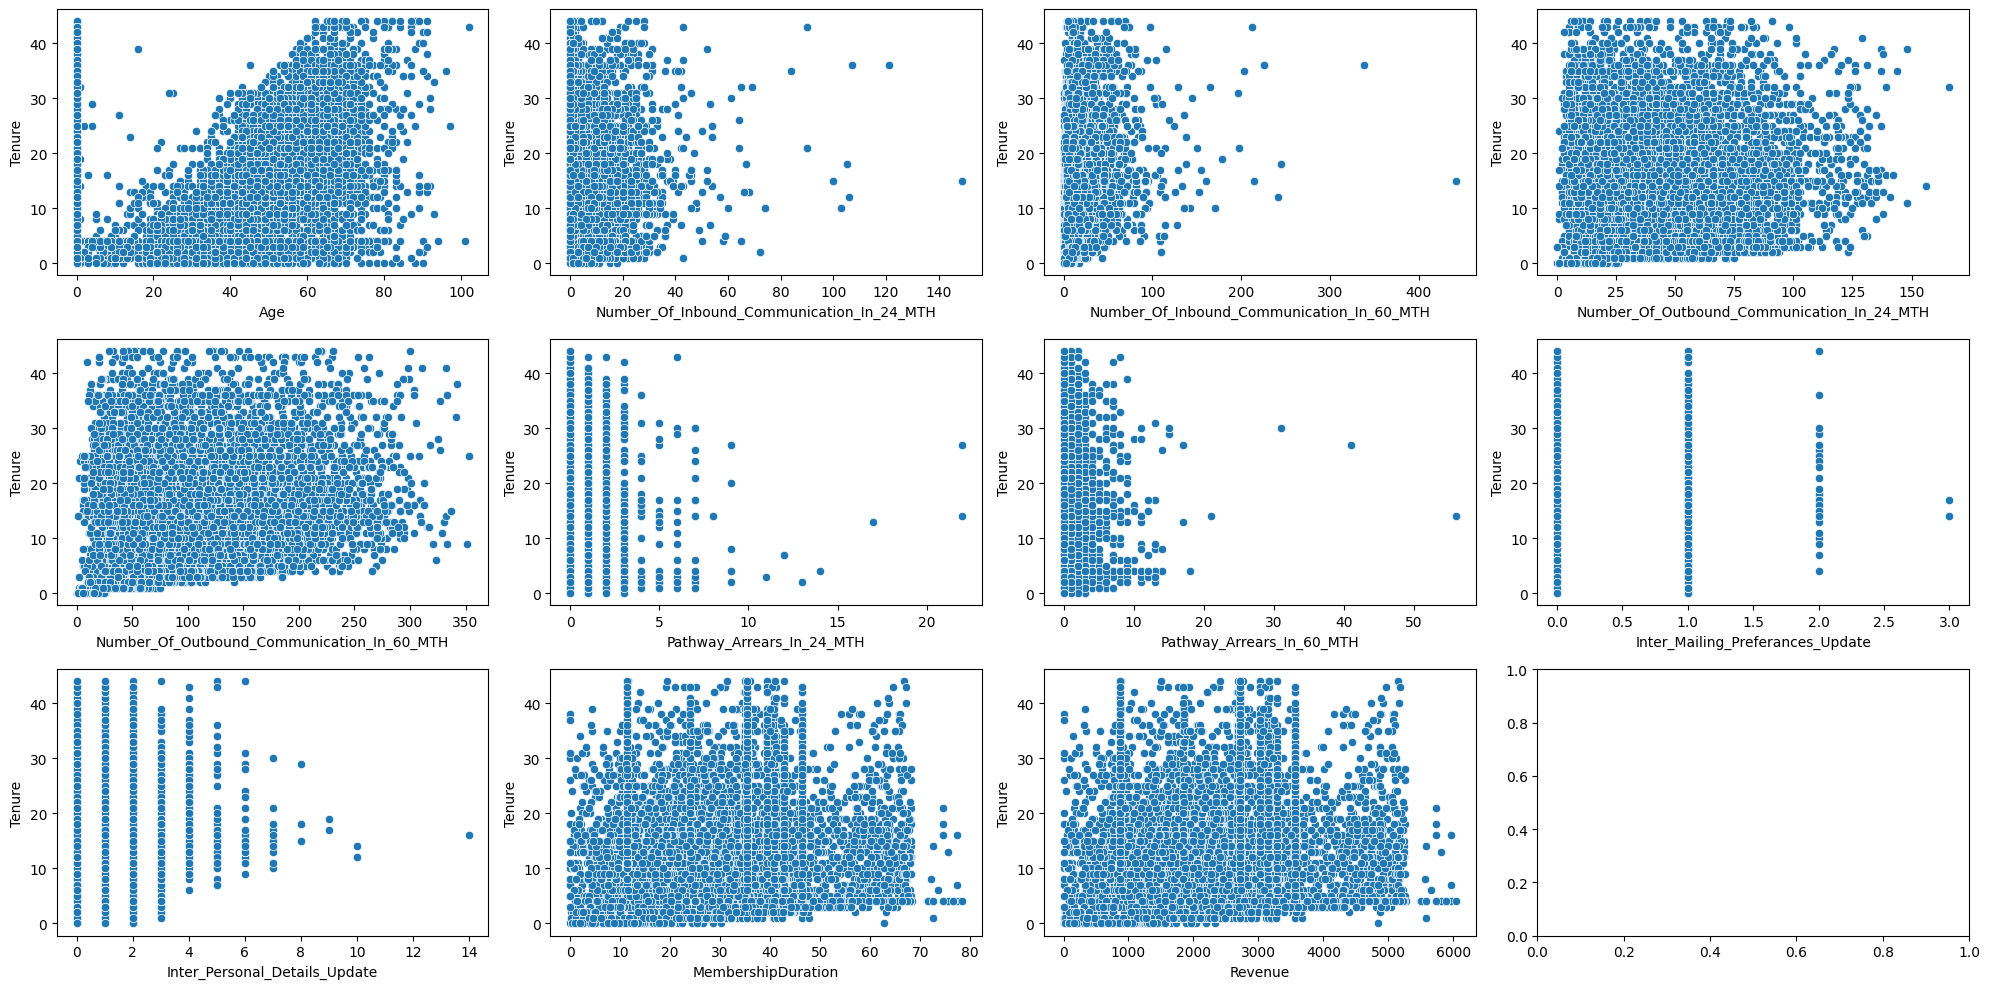

In [ ]:
#Visualize the relationship between Membership Duration to other numberical attributes
selected_variables = df_membership[['Age','Number_Of_Inbound_Communication_In_24_MTH','Number_Of_Inbound_Communication_In_60_MTH',
                                  'Number_Of_Outbound_Communication_In_24_MTH','Number_Of_Outbound_Communication_In_60_MTH','Pathway_Arrears_In_24_MTH',
                                  'Pathway_Arrears_In_60_MTH','Inter_Mailing_Preferances_Update','Inter_Personal_Details_Update',
                                  'MembershipDuration', 'Revenue']]
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for i, var in enumerate(selected_variables):
    row = i // 4
    col = i % 4
    sns.scatterplot(data=df_membership, x=var, y='Tenure', ax=axes[row, col])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Tenure')

plt.tight_layout()
plt.show()


In [ ]:
# Create a box plot chart using Plotly Express
fig = px.box(df_membership, x='Gender', y='Revenue', title='Box Plot of Revenue by Gender of unique customer purchased [Customized, Detailed] basket')
fig.update_layout(
    width=900,   # Set the width of the chart
    height=500   # Set the height of the chart
)

# Show the plot
fig.show()

In [ ]:
# Create a grouped bar chart using Plotly Express
revenue_by_state_status = df_membership.groupby(['State', 'IsActiveMembership'])['Revenue'].sum().reset_index()

fig = px.bar(revenue_by_state_status, x='State', y='Revenue', color='IsActiveMembership',
             title='Revenue by State and Membership Status',
             color_discrete_map={True: '#00CC96' , False: '#AB63FA'})
sorted_states = revenue_by_state_status.groupby('State')['Revenue'].sum().sort_values(ascending=False).index
fig.update_xaxes(categoryorder='array', categoryarray=sorted_states)

fig.update_layout(
    width=800,   # Set the width of the chart
    height=500   # Set the height of the chart
)
# Show the plot
fig.show()


In [ ]:
import plotly.express as px

df_membership['Month-Year'] = df_membership['FulfilmentDate'].dt.to_period('M').dt.to_timestamp()

# Count unique Membership customers over time based on CostID
df_membership_time = df_membership.groupby('Month-Year', as_index=False)['CostID'].count()


# Create the line chart using Plotly Express for Membership and Advert
fig = px.line(df_membership_time, x='Month-Year', y = 'CostID' , markers=True,
              title='Total number of Membership over Time')

# Rename the y-axis label
fig.update_layout(yaxis_title='Count of CostID')

# Show the line chart
fig.show()

<ipython-input-34-268b0295a701>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Check data
df_membership_time.head()

,Month-Year,CostID
0,2017-01-01,1
1,2017-02-01,5
2,2017-03-01,3
3,2017-04-01,5
4,2017-05-01,8


In [ ]:
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Calculate the frequency of purchase based on CostID
frequency = df['CostID'].value_counts().reset_index()
frequency.columns = ['CostID', 'Frequency']

# Merge the frequency column with customer_products
customer_products = customer_products.merge(frequency, on='CostID', how='left')


In [ ]:
# Calculate the frequency of purchase and total revenue based on CostID
aggregated_data = df.groupby('CostID').agg({'Product': frozenset, 'Revenue': 'sum'}).reset_index()

# Merge the aggregated_data with customer_products
customer_products = customer_products.merge(aggregated_data, on=['CostID', 'Product'], how='left')


In [ ]:
# Filter customer_products for rows containing only the set {'Customized', 'Detailed'}
desired_set = {'Customized', 'Detailed'}
filtered_customer_products = customer_products[customer_products['Product'].apply(lambda x: set(x) == desired_set)]

In [ ]:
print("Min:", filtered_customer_products['Frequency'].min())
print("Mean:", filtered_customer_products['Frequency'].mean())
print("Max:", filtered_customer_products['Frequency'].max())

Min: 2
Mean: 13.215286425902864
Max: 47


In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(filtered_customer_products, title='Data Profile Report', explorative=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fcf03f915da811b6380f5866583d611d18a6d16612b57cc92389cde088e8b2f9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-43-579cecb916b1>:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
profile.to_file('data_profile_report.html')


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
filtered_customer_products['Revenue'].sum()

1070255.0

In [ ]:
# Create a histogram using Plotly Express
fig = px.histogram(filtered_customer_products, x='Frequency', nbins=20, title='Histogram of Frequency',
                   color_discrete_sequence=['#46185e'])  # Add custom color

fig.update_layout(
    autosize=False,
    width=600,  # Set the width of the plot
    height=400,  # Set the height of the plot
    bargap=0.1
)

# Show the histogram
fig.show()

In [ ]:
filter_values = ['Detailed', 'Customized']
filtered_df = df[df['Product'].isin(filter_values)][['CostID', 'Product', 'FulfilmentDate']]

In [ ]:
purchasetime_df = filtered_df.merge(filtered_customer_products, on='CostID', how='inner')


In [ ]:
#Drop 'Product_x' column

purchasetime_df = purchasetime_df.drop(columns=['Product_x'])

# Rename 'Product_y' to 'ProductBasket'
purchasetime_df = purchasetime_df.rename(columns={'Product_y': 'ProductBasket'})


In [ ]:
# purchasetime_df['FulfilmentDate_Min'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].transform('min')
# purchasetime_df['FulfilmentDate_Max'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].transform('max')

In [ ]:
purchasetime_df['FulfilmentDate'] = pd.to_datetime(purchasetime_df['FulfilmentDate'])

# Sort the DataFrame by CostID and FulfilmentDate
purchasetime_df = purchasetime_df.sort_values(by=['CostID', 'FulfilmentDate'])

# Calculate the recency between each purchase for the same CostID
purchasetime_df['Recency'] = purchasetime_df.groupby('CostID')['FulfilmentDate'].diff().dt.days

In [ ]:
purchasetime_df

,CostID,FulfilmentDate,ProductBasket,Frequency,Revenue,Recency
35603,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-02-02,"(Detailed, Customized)",5,65.0,NaN
35604,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-10-17,"(Detailed, Customized)",5,65.0,257.0
35606,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2018-10-17,"(Detailed, Customized)",5,65.0,0.0
35602,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2020-11-03,"(Detailed, Customized)",5,65.0,748.0
35605,{0010C3D6-1A86-4BC9-AA07-CB7EB0222081},2020-11-03,"(Detailed, Customized)",5,65.0,0.0
...,...,...,...,...,...,...
19480,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2021-09-24,"(Detailed, Customized)",17,203.0,245.0
19484,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2021-11-06,"(Detailed, Customized)",17,203.0,43.0
19491,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2022-01-13,"(Detailed, Customized)",17,203.0,68.0
19493,{FFF33934-A2C2-4B16-B7DD-45F5596A6A02},2022-01-13,"(Detailed, Customized)",17,203.0,0.0


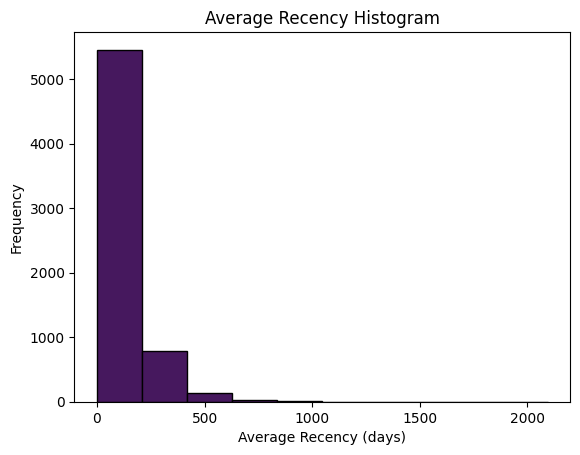

In [ ]:
# Calculate the average recency for each CostID
average_recency = purchasetime_df.groupby('CostID')['Recency'].mean()

# Create a histogram for average recency
plt.hist(average_recency, bins=10, edgecolor='black', color ='#46185e')
plt.title('Average Recency Histogram')
plt.xlabel('Average Recency (days)')
plt.ylabel('Frequency')
plt.show()

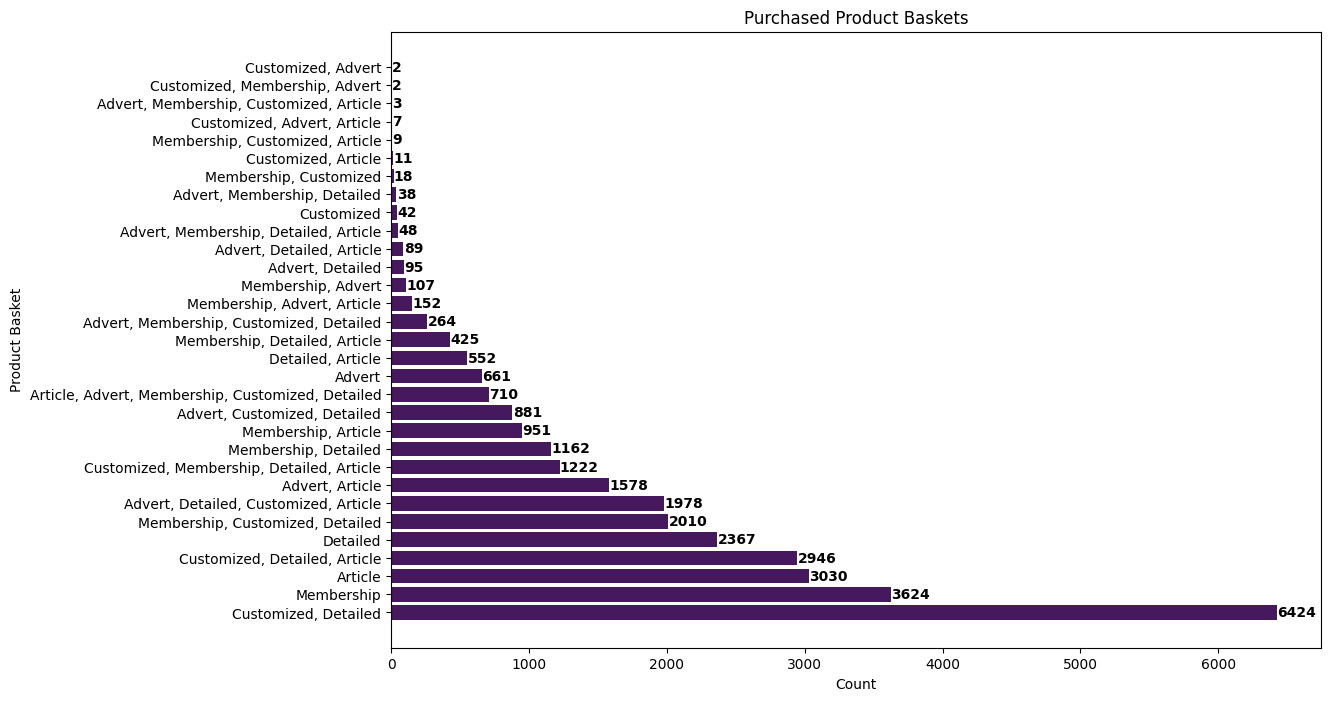

In [ ]:
#Group by 'CostID' and create a unique list of products for each customer
customer_products = df.groupby('CostID')['Product'].apply(frozenset).reset_index()

# Count the occurrences of each unique 'ProductBasket'
product_basket_counts = customer_products['Product'].value_counts().reset_index()
product_basket_counts.columns = ['ProductBasket', 'Count']

# Convert frozensets to strings
product_basket_counts['ProductBasket'] = product_basket_counts['ProductBasket'].apply(lambda x: ', '.join(x))

# Set the figure size for the horizontal bar chart
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
ax = plt.barh(product_basket_counts['ProductBasket'], product_basket_counts['Count'], color='#46185e')

# Show the values on top of the bars
for bar in ax.patches:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center', color='black', fontweight='bold')

# Set x-axis label
plt.xlabel("Count")

# Set y-axis label
plt.ylabel("Product Basket")

# Set plot title
plt.title("Purchased Product Baskets")

# Show the plot
plt.show()


#MODEL TRAINING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CostID                                      31408 non-null  object        
 1   Affluence_Level                             31408 non-null  object        
 2   Tenure                                      31408 non-null  int64         
 3   Age                                         31408 non-null  float64       
 4   Gender                                      31408 non-null  object        
 5   State                                       31408 non-null  object        
 6   HasValidEmailAddress                        31408 non-null  bool          
 7   HasValidMobileNumber                        31408 non-null  bool          
 8   Number_Of_Inbound_Communication_In_24_MTH   31408 non-null  int64         
 9   Numbe

In [ ]:
df_new  = df.copy()

In [ ]:
df_new = df_new.drop(columns=['TotPaidR', 'MembershipRevenue', 'contract_ID', 'FulfilmentDate', 'FulfilmentEndedDate'])


<ipython-input-299-5f20f5e28c02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")


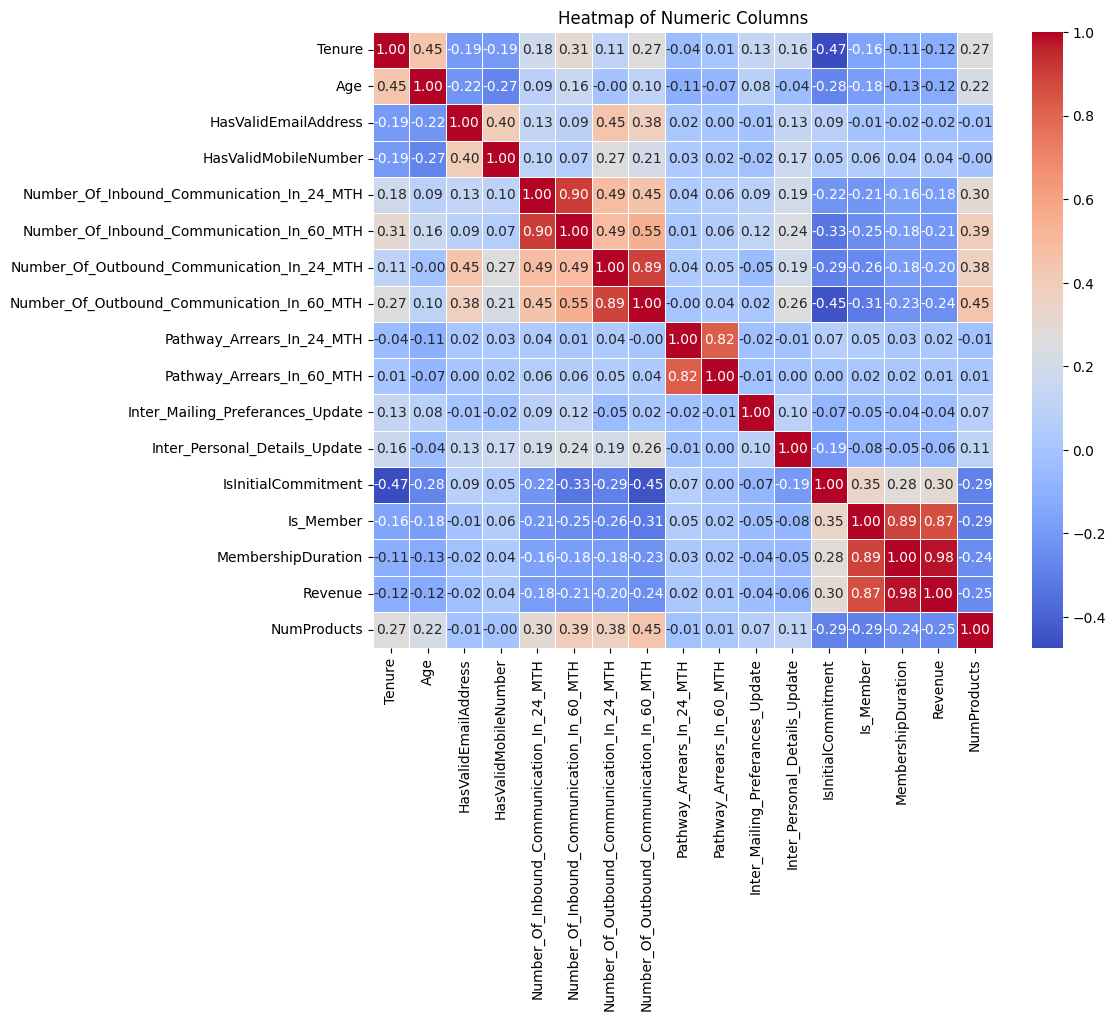

In [ ]:
# Create a heatmap for the numeric columns
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Numeric Columns')
plt.show()

In [ ]:
df_new = df_new.drop(columns=['Number_Of_Inbound_Communication_In_24_MTH', 'Number_Of_Outbound_Communication_In_24_MTH', 'Pathway_Arrears_In_24_MTH', 'MembershipDuration', 'ProductBasket','Product'])


In [ ]:
df_new['Is_Member']. value_counts()

0    26123
1     5285
Name: Is_Member, dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CostID                                      31408 non-null  object 
 1   Affluence_Level                             31408 non-null  object 
 2   Tenure                                      31408 non-null  int64  
 3   Age                                         31408 non-null  float64
 4   Gender                                      31408 non-null  object 
 5   State                                       31408 non-null  object 
 6   HasValidEmailAddress                        31408 non-null  bool   
 7   HasValidMobileNumber                        31408 non-null  bool   
 8   Number_Of_Inbound_Communication_In_60_MTH   31408 non-null  int64  
 9   Number_Of_Outbound_Communication_In_60_MTH  31408 non-null  int64  
 10  Pathway_A

In [ ]:
numeric_columns = ['Tenure', 'Age', 'Number_Of_Inbound_Communication_In_60_MTH', 'Number_Of_Outbound_Communication_In_60_MTH', 'Pathway_Arrears_In_60_MTH',
                   'Inter_Mailing_Preferances_Update', 'Inter_Personal_Details_Update', 'Revenue', 'NumProducts']
categorical_columns = ['Affluence_Level', 'Gender','State','HasValidEmailAddress','HasValidMobileNumber','IsInitialCommitment']

**TRANSFORMED_DF**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame for transformation
transformed_df = df_new.copy()

# Initialize MinMaxScaler for numeric columns
scaler = MinMaxScaler()

# Scale numeric columns to the range [0, 1]
transformed_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Apply one-hot encoding to categorical columns using pd.get_dummies
transformed_df = pd.get_dummies(transformed_df, columns=categorical_columns, drop_first=False)


In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31408 entries, 0 to 314617
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CostID                                         31408 non-null  object 
 1   Tenure                                         31408 non-null  float64
 2   Age                                            31408 non-null  float64
 3   Number_Of_Inbound_Communication_In_60_MTH      31408 non-null  float64
 4   Number_Of_Outbound_Communication_In_60_MTH     31408 non-null  float64
 5   Pathway_Arrears_In_60_MTH                      31408 non-null  float64
 6   Inter_Mailing_Preferances_Update               31408 non-null  float64
 7   Inter_Personal_Details_Update                  31408 non-null  float64
 8   Is_Member                                      31408 non-null  int64  
 9   Revenue                                        31

In [ ]:
transformed_df.head()

,CostID,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,Is_Member,Revenue,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
0,{989B70F7-7675-4DF8-93F0-0A75316240D7},0.244898,0.722222,0.067873,0.451253,0.000000,0.166667,0.071429,0,0.001510,0.25,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
9,{E623E1C9-F93C-4827-B28B-7C11D4ADB6AB},0.285714,0.476491,0.000000,0.167131,0.000000,0.000000,0.000000,0,0.004530,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
11,{4D47D5CB-5400-4A4F-871C-C1D5AFDE69D8},0.183673,0.527778,0.079186,0.596100,0.000000,0.000000,0.000000,0,0.001510,0.25,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
13,{474ADB1F-BFC8-46AD-A91B-E38911C2115C},0.285714,0.666667,0.101810,0.409471,0.017857,0.000000,0.000000,1,0.456331,0.00,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
15,{46F70EE2-7DD8-483C-A5F6-F33F1211C85E},0.081633,0.476491,0.000000,0.247911,0.000000,0.000000,0.000000,0,0.004530,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0


<ipython-input-307-5ae45d5bcfcc>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws=annot_kws)


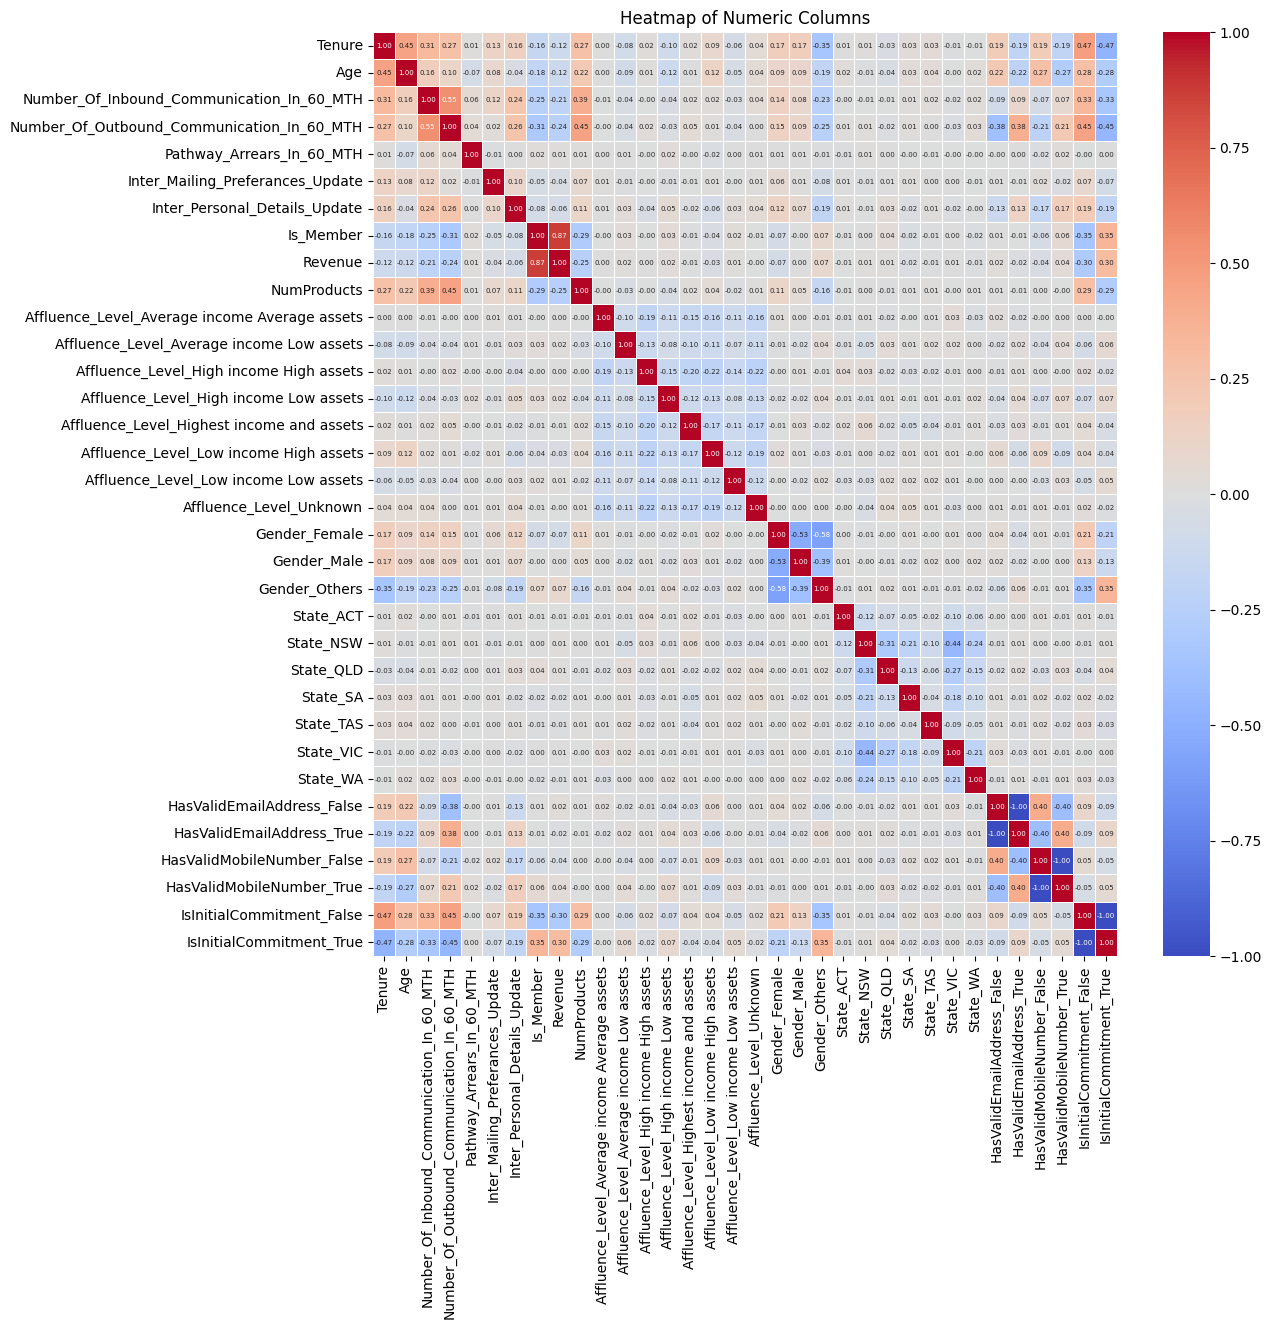

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the numeric columns
plt.figure(figsize=(12, 12))  # Adjust the figure size if needed

# Define custom annotation keyword arguments
annot_kws = {"fontsize": 5}  # Change the font size to 8 (or any other desired size)

sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws=annot_kws)

plt.title('Heatmap of Numeric Columns')
plt.show()


In [ ]:
from sklearn.utils import shuffle

# Shuffle transformed_df
shuffled_df = shuffle(transformed_df)

In [ ]:
shuffled_df.shape

(31408, 35)

In [ ]:
shuffled_df.drop(columns=['CostID'])

**Split dataset to 2 samples: Sample 1 used for training and testing, Sample 2 used for Validation the propensity score**

In [ ]:
# Sample 1: 6300 records non member
sample_1 = shuffled_df[shuffled_df['Is_Member'] == 0].sample(n=6300, random_state=42)


# Sample 2: The remaining
sample_2 = shuffled_df.drop(sample_1.index)

# Reset index for both samples
sample_1.reset_index(drop=True, inplace=True)
sample_2.reset_index(drop=True, inplace=True)

In [ ]:
print("Sample 1 shape: ", sample_1.shape)
print("Sample 2 shape: ", sample_2.shape)


Sample 1 shape:  (6300, 35)
Sample 2 shape:  (25108, 35)


In [ ]:
sample_2.head()

,CostID,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,Is_Member,Revenue,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
0,{2E469F7C-AF68-4471-84F9-F912746D41F4},0.081633,0.055556,0.031674,0.428969,0.000000,0.0,0.000000,0,0.001510,0.5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0
1,{525FBE8B-62A6-4315-909E-0D671466E694},0.265306,0.152778,0.042986,0.350975,0.017857,0.0,0.142857,0,0.001510,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
2,{8D1C5311-872B-405D-AF5B-A0B6BDEC5210},0.244898,0.347222,0.013575,0.289694,0.000000,0.0,0.000000,1,0.456331,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0
3,{962FA256-1810-4887-8EE0-1ED7CA209785},0.285714,0.736111,0.020362,0.395543,0.000000,0.0,0.000000,0,0.003188,0.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
4,{79DB4A2C-BCA5-4945-8C66-5C9678C9816C},0.306122,0.319444,0.049774,0.520891,0.000000,0.0,0.000000,0,0.001510,0.5,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
sample_1['Is_Member'].value_counts()

0    6300
Name: Is_Member, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = sample_2.drop(['CostID','Is_Member'], axis=1)  # Features
y = sample_2['Is_Member']  # Target variable


In [ ]:
X.head()

,Tenure,Age,Number_Of_Inbound_Communication_In_60_MTH,Number_Of_Outbound_Communication_In_60_MTH,Pathway_Arrears_In_60_MTH,Inter_Mailing_Preferances_Update,Inter_Personal_Details_Update,Revenue,NumProducts,Affluence_Level_Average income Average assets,Affluence_Level_Average income Low assets,Affluence_Level_High income High assets,Affluence_Level_High income Low assets,Affluence_Level_Highest income and assets,Affluence_Level_Low income High assets,Affluence_Level_Low income Low assets,Affluence_Level_Unknown,Gender_Female,Gender_Male,Gender_Others,State_ACT,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,HasValidEmailAddress_False,HasValidEmailAddress_True,HasValidMobileNumber_False,HasValidMobileNumber_True,IsInitialCommitment_False,IsInitialCommitment_True
0,0.081633,0.055556,0.031674,0.428969,0.000000,0.0,0.000000,0.001510,0.5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0
1,0.265306,0.152778,0.042986,0.350975,0.017857,0.0,0.142857,0.001510,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
2,0.244898,0.347222,0.013575,0.289694,0.000000,0.0,0.000000,0.456331,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0
3,0.285714,0.736111,0.020362,0.395543,0.000000,0.0,0.000000,0.003188,0.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
4,0.306122,0.319444,0.049774,0.520891,0.000000,0.0,0.000000,0.001510,0.5,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
y.value_counts()

0    19823
1     5285
Name: Is_Member, dtype: int64

In [ ]:
# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data to perform the oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Is_Member'] = y_resampled

# Check the class distribution after upsampling
print(df_resampled['Is_Member'].value_counts())

0    19823
1    19823
Name: Product, dtype: int64


In [ ]:

# Split the resampled dataset into training (70%) and validation (30%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3,random_state=42)

# Create and configure the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = random_forest_model.predict(X_valid)



In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_valid, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate Kappa
kappa = cohen_kappa_score(y_valid, y_pred)
print(f'Kappa: {kappa:.2f}')

# Calculate ROC AUC
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_valid, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = recall_score(y_valid, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_valid, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.99
MAE: 0.01
Kappa: 0.97
ROC AUC: 0.99
Precision: 0.97
Recall: 0.98
F1 Score: 0.98


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_valid, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5904
           1       0.97      0.98      0.98      1629

    accuracy                           0.99      7533
   macro avg       0.98      0.99      0.98      7533
weighted avg       0.99      0.99      0.99      7533



Text(0.5, 1.0, 'Confusion Matrix')

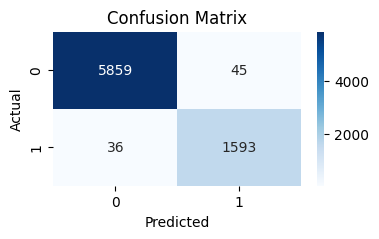

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
propensity_scores = random_forest_model.predict_proba(X)[:, 1]


In [ ]:
sample_2['Propensity_Score'] = propensity_scores


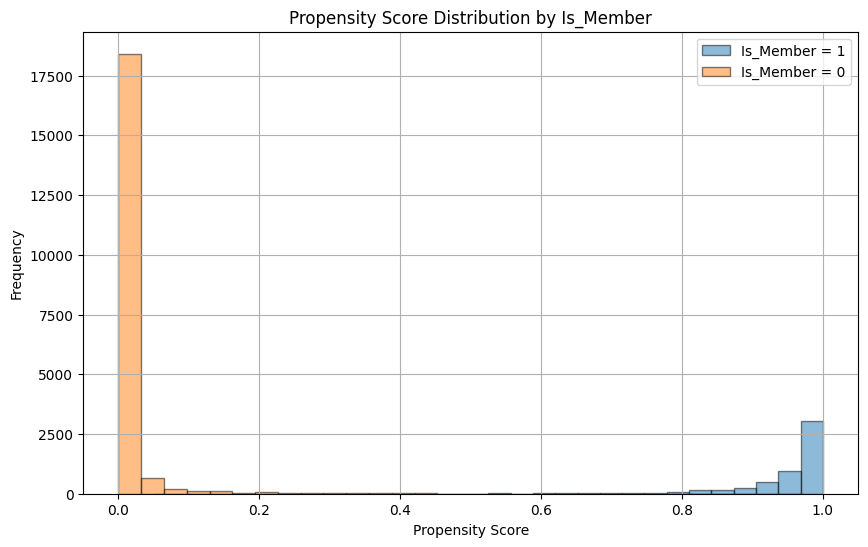

In [ ]:
# Separate propensity scores for Is_Member = 0 and Is_Member = 1
ps_member = sample_2[sample_2['Is_Member'] == 1]['Propensity_Score']
ps_non_member = sample_2[sample_2['Is_Member'] == 0]['Propensity_Score']

# Create histograms for both groups
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Plot the histogram for Is_Member = 1
plt.hist(ps_member, bins=30, alpha=0.5, label='Is_Member = 1', edgecolor='k')

# Plot the histogram for Is_Member = 0
plt.hist(ps_non_member, bins=30, alpha=0.5, label='Is_Member = 0', edgecolor='k')

plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Propensity Score Distribution by Is_Member')
plt.legend()
plt.grid(True)

# Show the histograms
plt.show()





<ipython-input-54-73261a1920bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(ps_member, shade=True, label='ever_bought')
<ipython-input-54-73261a1920bd>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(ps_non_member, shade=True, label='never_bought')


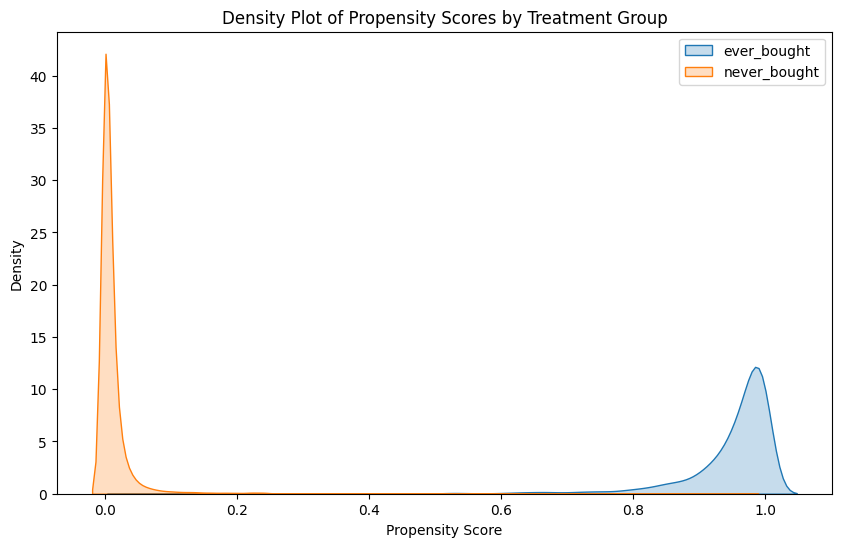

In [ ]:
# Plotting
import seaborn as sn
plt.figure(figsize=(10, 6))
sn.kdeplot(ps_member, shade=True, label='ever_bought')
sn.kdeplot(ps_non_member, shade=True, label='never_bought')
plt.title('Density Plot of Propensity Scores by Treatment Group')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

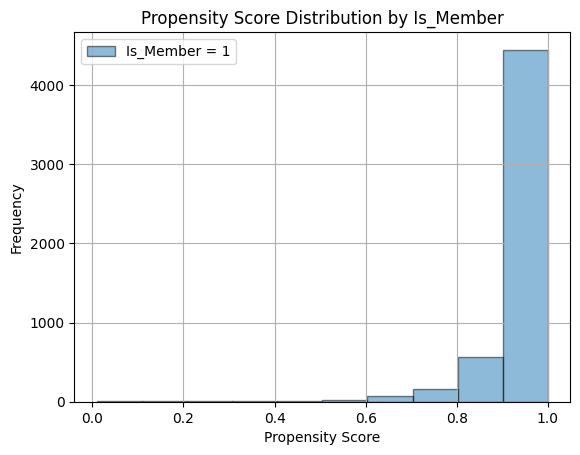

In [ ]:
# Plot the histogram for Is_Member = 1
plt.hist(ps_member, bins=10, alpha=0.5, label='Is_Member = 1', edgecolor='k')

plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Propensity Score Distribution by Is_Member')
plt.legend()
plt.grid(True)

# Show the histograms
plt.show()

In [ ]:
# Define the bins for propensity score groups
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create labels for the groups
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Cut the 'Propensity_Score' column into bins and add the 'Group' column to sample_2
sample_2['Group'] = pd.cut(sample_2['Propensity_Score'], bins=bins, labels=labels)

# Group by 'Group' and 'Is_Member' columns and count the occurrences
grouped_counts = sample_2.groupby(['Group', 'Is_Member']).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Calculate the percentage of member and non-member for each group
total_rows = len(sample_2)
grouped_counts['Member (%)'] = (grouped_counts[1] / total_rows) * 100
grouped_counts['Non-Member (%)'] = (grouped_counts[0] / total_rows) * 100

# Display the grouped counts and percentages
print(grouped_counts)

Is_Member     0     1  Total  Member (%)  Non-Member (%)
Group                                                   
0-0.2      6765    14   6779    0.055759       26.943604
0.2-0.4     162     7    169    0.027880        0.645213
0.4-0.6      38    32     70    0.127449        0.151346
0.6-0.8      20   225    245    0.896129        0.079656
0.8-1.0       4  5007   5011   19.941851        0.015931


In [ ]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CostID                                         6300 non-null   object 
 1   Tenure                                         6300 non-null   float64
 2   Age                                            6300 non-null   float64
 3   Number_Of_Inbound_Communication_In_60_MTH      6300 non-null   float64
 4   Number_Of_Outbound_Communication_In_60_MTH     6300 non-null   float64
 5   Pathway_Arrears_In_60_MTH                      6300 non-null   float64
 6   Inter_Mailing_Preferances_Update               6300 non-null   float64
 7   Inter_Personal_Details_Update                  6300 non-null   float64
 8   Is_Member                                      6300 non-null   int64  
 9   Revenue                                        6300 

In [ ]:
CostID= sample_1.CostID
Member=sample_1.Is_Member
sample_1=sample_1.drop(['CostID','Is_Member'],axis=1)

In [ ]:
sample_1['propensity'] = random_forest_model.predict_proba(sample_1)[:,1]


In [ ]:
results = pd.concat([CostID, Member, sample_1], axis=1)

In [ ]:
merged_results = results.merge(df[['CostID', 'ProductBasket']], on='CostID', how='left')


In [ ]:
merged_results.to_csv('results_non_members.csv')

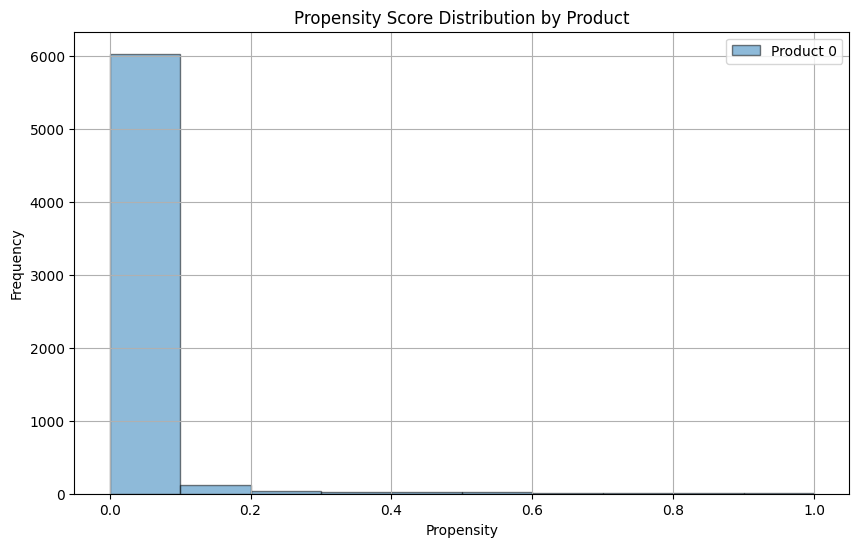

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Create the histogram with custom bins
plt.hist(merged_results['propensity'], bins=bin_edges, alpha=0.5, label='Product 0', edgecolor='k')

plt.xlabel('Propensity')
plt.ylabel('Frequency')
plt.title('Propensity Score Distribution by Product')
plt.legend()
plt.grid(True)

# Show the histograms
plt.show()

In [ ]:
# Define the bins for propensity score groups
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create labels for the groups
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

# Cut the 'Propensity_Score' column into bins and add the 'Group' column to sample_2
merged_results['Group'] = pd.cut(merged_results['propensity'], bins=bins, labels=labels)

# Group by 'Group' and 'Is_Member' columns and count the occurrences
grouped_counts = merged_results.groupby(['Group', 'Is_Member']).size().unstack(fill_value=0)

# Calculate the total count for each group
grouped_counts['Total'] = grouped_counts.sum(axis=1)

# Calculate the percentage of member and non-member for each group
total_rows = len(merged_results)
grouped_counts['Group(%)'] = (grouped_counts[0] / total_rows) * 100

# Display the grouped counts and percentages
print(grouped_counts)

Is_Member     0  Total   Group(%)
Group                            
0-0.2      2909   2909  46.174603
0.2-0.4      49     49   0.777778
0.4-0.6      49     49   0.777778
0.6-0.8      19     19   0.301587
0.8-1.0      16     16   0.253968


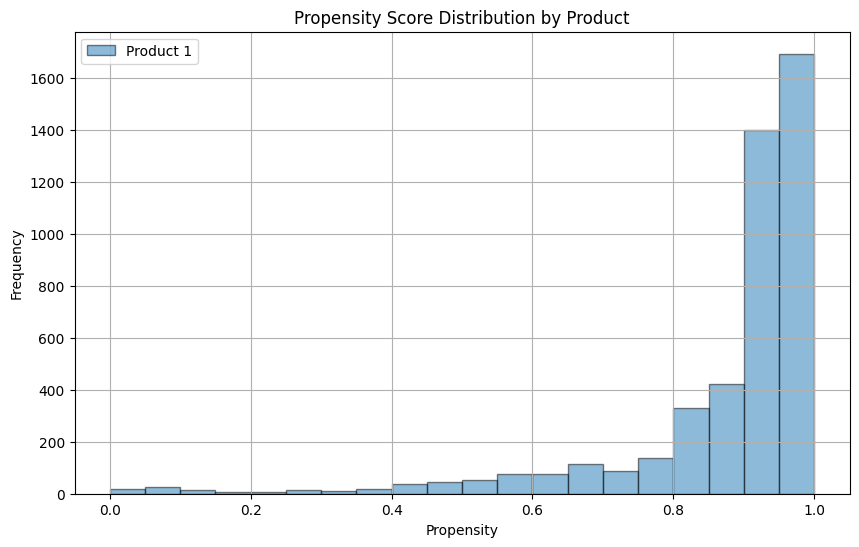

In [ ]:
# Create histograms for each product group
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(product_1['propensity'], bins=20, alpha=0.5, label='Product 1', edgecolor='k')
plt.xlabel('Propensity')
plt.ylabel('Frequency')
plt.title('Propensity Score Distribution by Product')
plt.legend()
plt.grid(True)

# Show the histograms
plt.show()

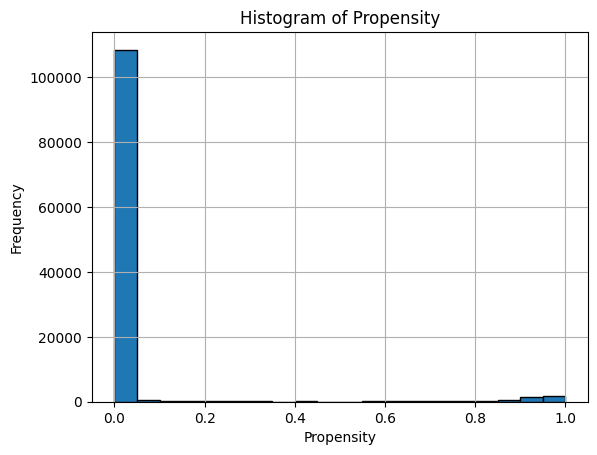

In [ ]:
# Create a histogram
plt.hist(sample_2['propensity'], bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Propensity')
plt.ylabel('Frequency')
plt.title('Histogram of Propensity')
plt.grid(True)

# Show the histogram
plt.show()

**Feature Importance**

In [ ]:
feature_cols = [col for col in X.columns if col != 'Is_Member']


In [ ]:
feature_importances = random_forest_model.feature_importances_

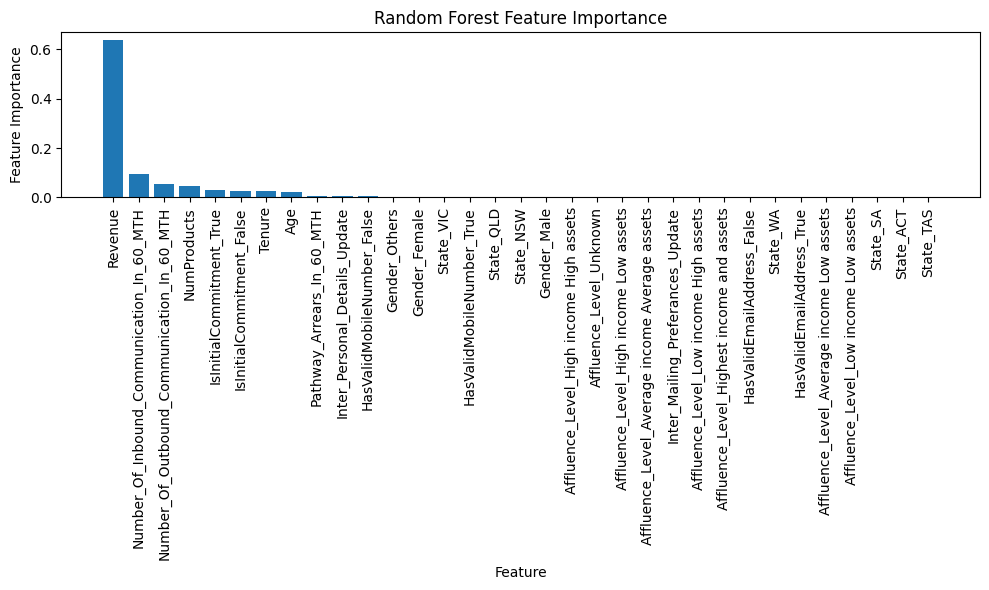

In [ ]:
feature_names = feature_cols #feature_names can run only for a list of column names

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()